<a href="https://colab.research.google.com/github/mmanevskaya/pythonLabs/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D1%80%D0%B5%D0%B4%D0%B8%D1%82%D0%BD%D1%8B%D0%B9_%D1%80%D0%B5%D0%B9%D1%82%D0%B8%D0%BD%D0%B3%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# подключение библиотек
import pandas as pd
import random
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
import math as math
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [ ]:
url = "https://raw.githubusercontent.com/nazgull08/ibm7/master/ml/train.csv"
dataset = pd.read_csv(url)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Задание 1:
Посмотреть данные датасета

In [ ]:
dataset

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [ ]:
ds = dataset.drop(columns=["ID","Customer_ID","Name","SSN"])
ds1 = ds.dropna()
ds2 = ds1.copy()
ds2['Annual_Income'] = ds1["Annual_Income"].map(lambda x: float(x[:-1]))
ds2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58933 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     58933 non-null  object 
 1   Age                       58933 non-null  object 
 2   Occupation                58933 non-null  object 
 3   Annual_Income             58933 non-null  float64
 4   Monthly_Inhand_Salary     58933 non-null  float64
 5   Num_Bank_Accounts         58933 non-null  int64  
 6   Num_Credit_Card           58933 non-null  int64  
 7   Interest_Rate             58933 non-null  int64  
 8   Num_of_Loan               58933 non-null  object 
 9   Type_of_Loan              58933 non-null  object 
 10  Delay_from_due_date       58933 non-null  int64  
 11  Num_of_Delayed_Payment    58933 non-null  object 
 12  Changed_Credit_Limit      58933 non-null  object 
 13  Num_Credit_Inquiries      58933 non-null  float64
 14  Credit

In [ ]:
# All columns
cols = ds2.columns
# Find numerical columns
num_cols = ds2._get_numeric_data().columns
num_cols


Index(['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date',
       'Num_Credit_Inquiries', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month'],
      dtype='object')

In [ ]:
categorical = list(set(cols) - set(num_cols))
categorical

['Payment_Behaviour',
 'Age',
 'Occupation',
 'Outstanding_Debt',
 'Payment_of_Min_Amount',
 'Monthly_Balance',
 'Changed_Credit_Limit',
 'Credit_Score',
 'Num_of_Delayed_Payment',
 'Credit_History_Age',
 'Num_of_Loan',
 'Credit_Mix',
 'Amount_invested_monthly',
 'Type_of_Loan']

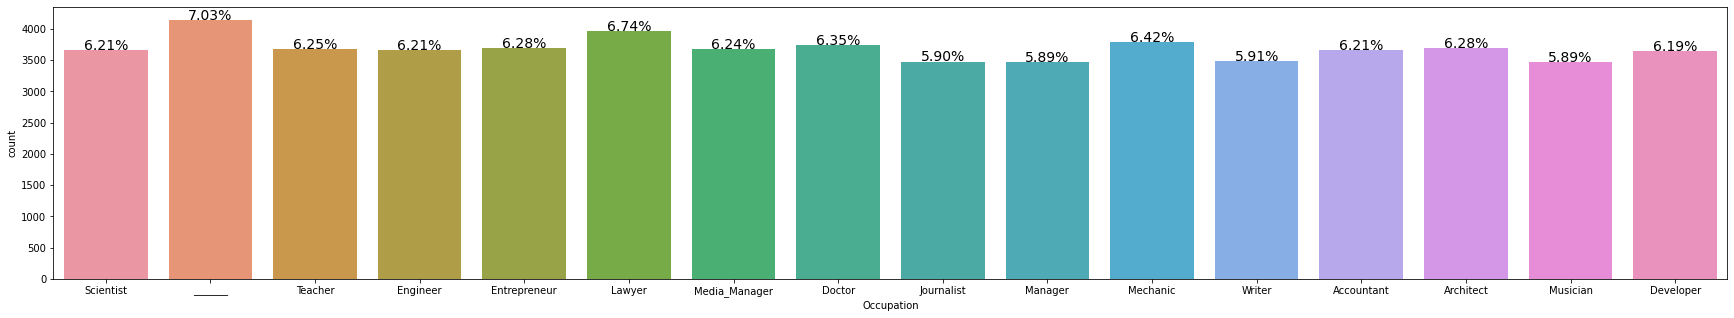

In [ ]:
plt.figure(figsize=(30, 5))

mar_plot = sb.countplot(x=ds2["Occupation"])
for p in mar_plot.patches:
    height = p.get_height()
    mar_plot.text(p.get_x()+p.get_width()/2, height + 3, '{:1.2f}%'.format(height/len(ds1)*100), ha="center", fontsize=14) 

# aaaa

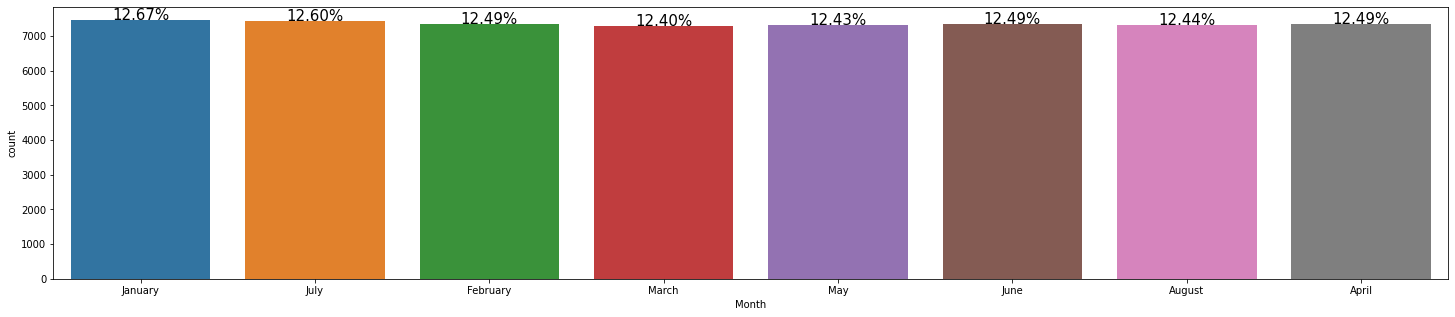

In [ ]:
plt.figure(figsize=(25, 5))

mar_plot = sb.countplot(x=ds2["Month"])
for p in mar_plot.patches:
    height = p.get_height()
    mar_plot.text(p.get_x()+p.get_width()/2, height + 3, '{:1.2f}%'.format(height/len(ds1)*100), ha="center", fontsize=15) 

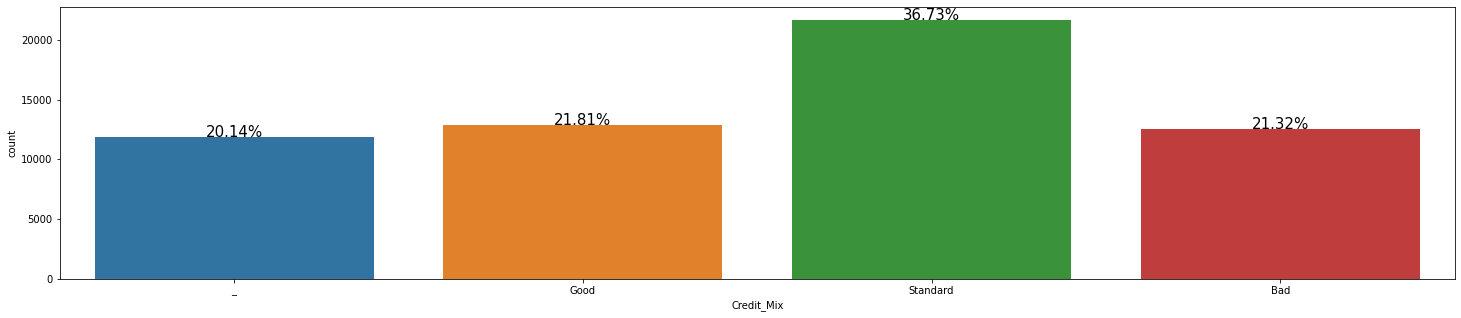

In [ ]:
plt.figure(figsize=(25, 5))

mar_plot = sb.countplot(x=ds2["Credit_Mix"])
for p in mar_plot.patches:
    height = p.get_height()
    mar_plot.text(p.get_x()+p.get_width()/2, height + 3, '{:1.2f}%'.format(height/len(ds1)*100), ha="center", fontsize=15) 

<AxesSubplot:xlabel='Month,Credit_Mix'>

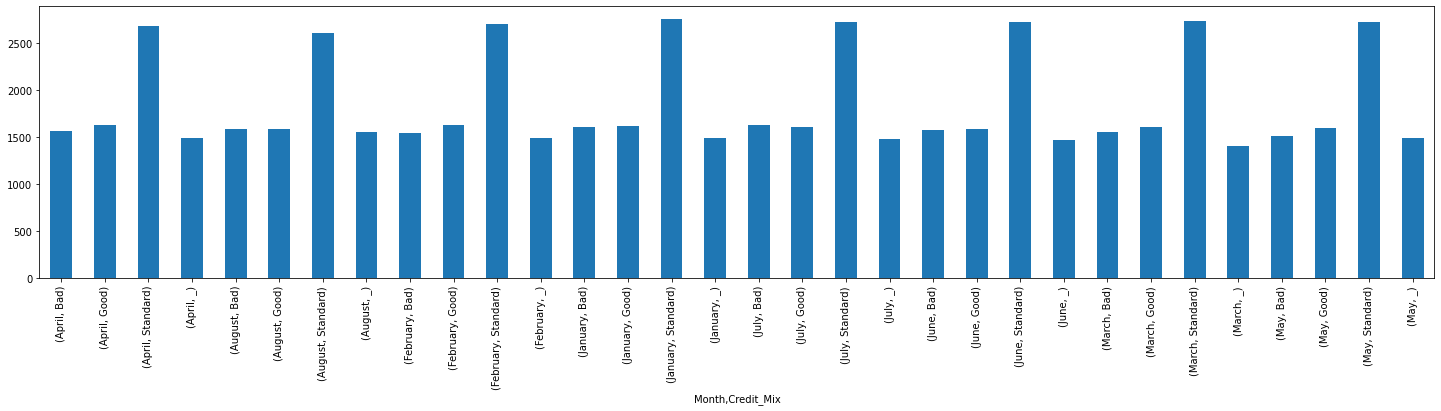

In [ ]:
plt.figure(figsize=(25, 5))
ds2.groupby(['Month','Credit_Mix']).size().plot(kind='bar')

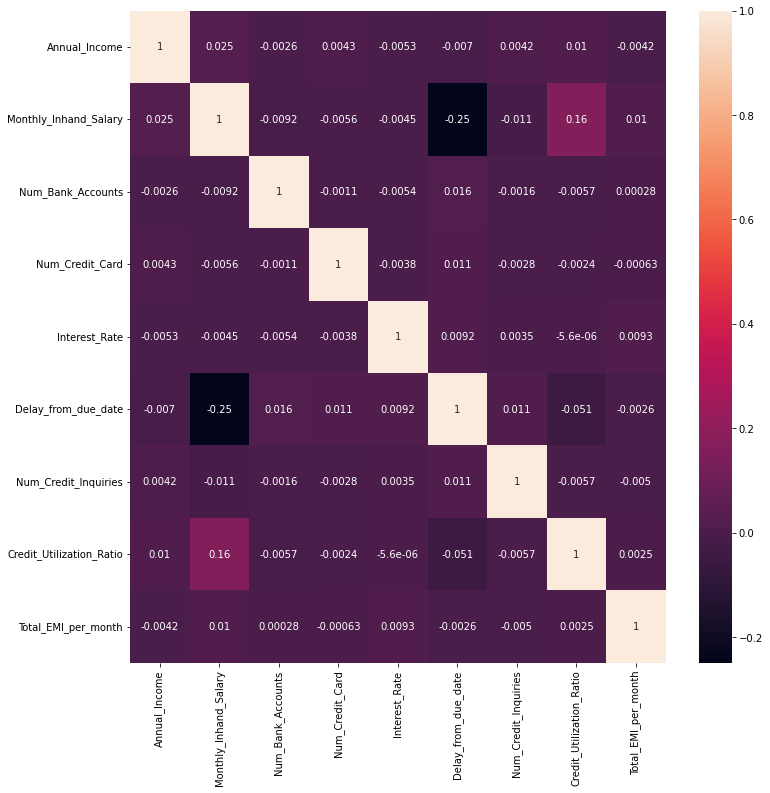

In [ ]:
plt.figure(figsize=(12, 12))

# plotting correlation heatmap
dataplot = sb.heatmap(ds2.corr(), annot=True)

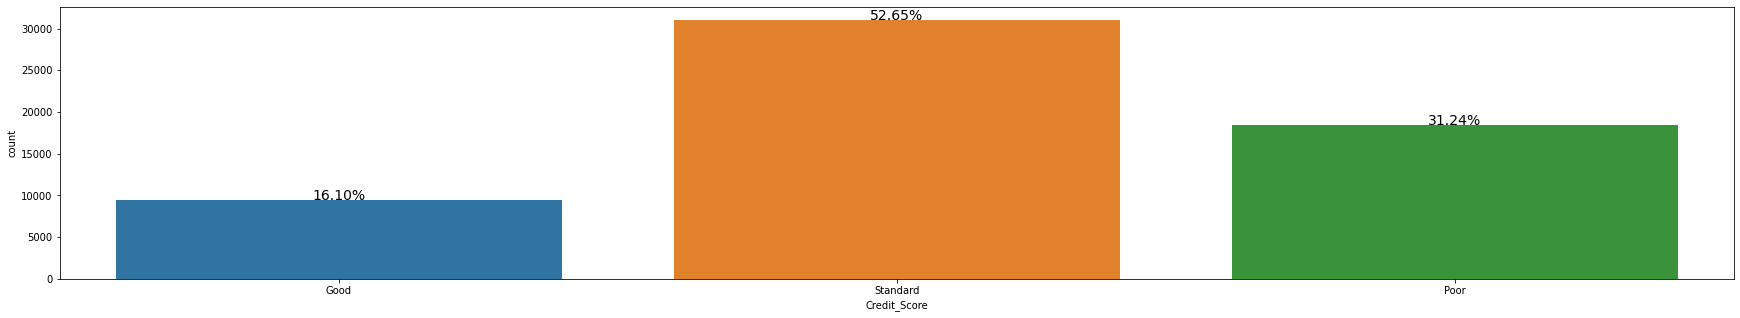

In [ ]:
plt.figure(figsize=(30, 5))

mar_plot = sb.countplot(x=ds2["Credit_Score"])
for p in mar_plot.patches:
    height = p.get_height()
    mar_plot.text(p.get_x()+p.get_width()/2, height + 3, '{:1.2f}%'.format(height/len(ds1)*100), ha="center", fontsize=14) 

<AxesSubplot:xlabel='Occupation,Credit_Score'>

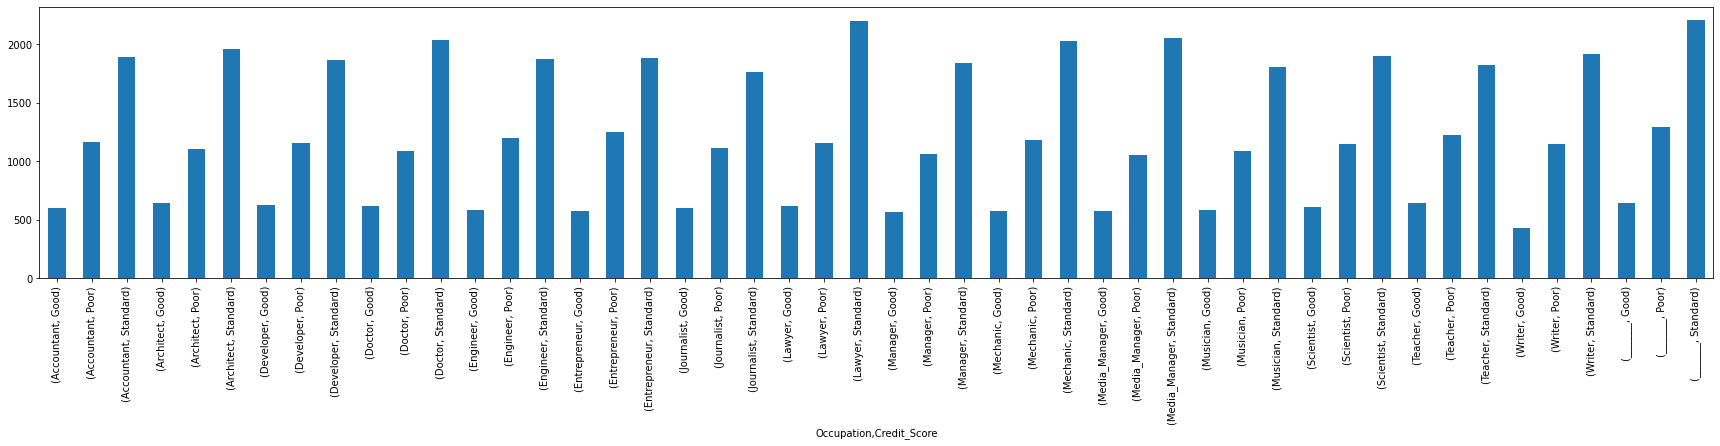

In [ ]:
plt.figure(figsize=(30, 5))
ds2.groupby(['Occupation','Credit_Score']).size().plot(kind='bar')

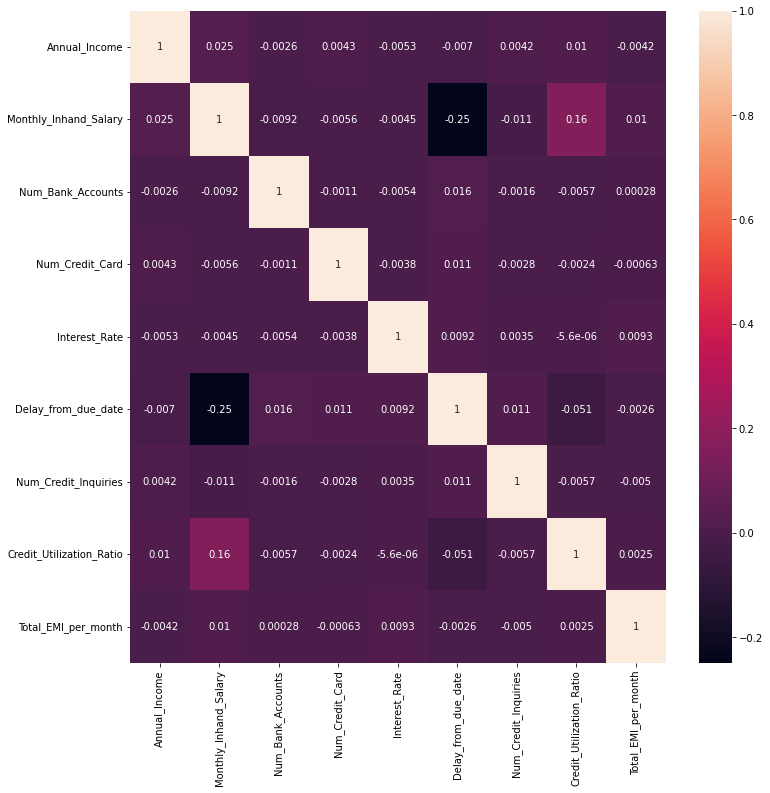

In [ ]:
plt.figure(figsize=(12, 12))

# plotting correlation heatmap
dataplot = sb.heatmap(ds2.corr(), annot=True)


In [ ]:
train_data = ds2.copy()
train_data['Credit_Score'] = ds2['Credit_Score'].map({'Poor':1, 'Standard':2, 'Good':3})
train_data

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.10,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,3
6,23,Scientist,19114.10,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,3
8,28_,_______,34847.80,3037.986667,2,4,6,1,Credit-Builder Loan,3,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,2
9,28,Teacher,34847.80,3037.986667,2,4,6,1,Credit-Builder Loan,7,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,3
10,28,Teacher,34847.84,3037.986667,2,1385,6,1,Credit-Builder Loan,3,...,_,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25,Mechanic,39628.90,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,...,_,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.58140274528395,High_spent_Medium_value_payments,410.256158,1
99995,25,Mechanic,39628.90,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,1
99996,25,Mechanic,39628.90,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,1
99997,25,Mechanic,39628.90,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,1


In [ ]:
credit_age = []
for i in train_data['Credit_History_Age']:
    credit_age.append(str(i).split(' ')[0])
    
train_data['Credit_History_Age'] = credit_age

train_data['Credit_History_Age'] = train_data['Credit_History_Age'].replace({'nan':np.nan})
train_data['Credit_History_Age'] = train_data['Credit_History_Age'].astype('float64')

In [ ]:
numerical_cols = [col for col in train_data.columns if (train_data[col].dtype == 'int64') | (train_data[col].dtype == 'float64')]

for x in list(numerical_cols):
    q75,q25 = np.percentile(train_data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    train_data.loc[train_data[x] < min,x] = np.nan
    train_data.loc[train_data[x] > max,x] = np.nan
  

In [ ]:
tr_d = train_data.drop(columns=["Type_of_Loan","Payment_Behaviour","Occupation",
                                "Credit_Mix","Age","Occupation","Num_of_Loan",
                                "Num_of_Delayed_Payment","Changed_Credit_Limit",
                                "Outstanding_Debt","Payment_of_Min_Amount","Amount_invested_monthly","Monthly_Balance"])
tr_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58933 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Annual_Income             57141 non-null  float64
 1   Monthly_Inhand_Salary     57464 non-null  float64
 2   Num_Bank_Accounts         58177 non-null  float64
 3   Num_Credit_Card           57571 non-null  float64
 4   Interest_Rate             57685 non-null  float64
 5   Delay_from_due_date       56999 non-null  float64
 6   Num_Credit_Inquiries      57983 non-null  float64
 7   Credit_Utilization_Ratio  58932 non-null  float64
 8   Credit_History_Age        58933 non-null  float64
 9   Total_EMI_per_month       55006 non-null  float64
 10  Credit_Score              58933 non-null  float64
dtypes: float64(11)
memory usage: 7.4 MB


In [ ]:
tr_d_clean = tr_d.dropna()
y = tr_d_clean['Credit_Score']
X = tr_d_clean.drop(columns=['Credit_Score'], axis=1)



In [ ]:
y

0        3.0
6        3.0
8        2.0
9        3.0
12       3.0
        ... 
99991    2.0
99994    1.0
99995    1.0
99996    1.0
99999    1.0
Name: Credit_Score, Length: 47833, dtype: float64

In [ ]:
X

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month
0,19114.10,1824.843333,3.0,4.0,3.0,3.0,4.0,26.822620,22.0,49.574949
6,19114.10,1824.843333,3.0,4.0,3.0,3.0,4.0,22.537593,22.0,49.574949
8,34847.80,3037.986667,2.0,4.0,6.0,3.0,2.0,24.464031,26.0,18.816215
9,34847.80,3037.986667,2.0,4.0,6.0,7.0,2.0,38.550848,26.0,18.816215
12,34847.80,3037.986667,2.0,4.0,6.0,3.0,2.0,34.977895,26.0,18.816215
...,...,...,...,...,...,...,...,...,...,...
99991,20002.80,1929.906667,10.0,8.0,29.0,33.0,9.0,37.140784,6.0,60.964772
99994,39628.90,3359.415833,4.0,6.0,7.0,20.0,3.0,39.323569,31.0,35.104023
99995,39628.90,3359.415833,4.0,6.0,7.0,23.0,3.0,34.663572,31.0,35.104023
99996,39628.90,3359.415833,4.0,6.0,7.0,18.0,3.0,40.565631,31.0,35.104023


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=500)

# Классификация

## Логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_train_lr=lr.predict(x_train)
y_pred_test_lr=lr.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
lr.coef_
lr.intercept_


print(confusion_matrix(y_train,y_pred_train_lr))
print('*'*20)
print(confusion_matrix(y_test,y_pred_test_lr))




[[  596 11025   164]
 [  482 19291   825]
 [   31  5389   463]]
********************
[[ 130 2759   37]
 [ 125 4798  195]
 [   3 1422   98]]


In [ ]:
print(classification_report(y_train,y_pred_train_lr))
print('*'*20)
print(classification_report(y_test,y_pred_test_lr))

              precision    recall  f1-score   support

         1.0       0.54      0.05      0.09     11785
         2.0       0.54      0.94      0.69     20598
         3.0       0.32      0.08      0.13      5883

    accuracy                           0.53     38266
   macro avg       0.47      0.36      0.30     38266
weighted avg       0.51      0.53      0.42     38266

********************
              precision    recall  f1-score   support

         1.0       0.50      0.04      0.08      2926
         2.0       0.53      0.94      0.68      5118
         3.0       0.30      0.06      0.11      1523

    accuracy                           0.53      9567
   macro avg       0.45      0.35      0.29      9567
weighted avg       0.49      0.53      0.41      9567



In [ ]:
print(accuracy_score(y_train, y_pred_train_lr))
print("\n")
print(accuracy_score(y_test, y_pred_test_lr))

0.5318036899597554


0.5253475488658932
